In [2]:
#fastai library
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *
#깃 클론
!git clone -b master --single-branch https://github.com/CAUdLearning/ZoomAttention.git
#경로
attention_types = ['a','m','d']
path = Path('ZoomAttention')
#이미지 가져오기
fns = get_image_files(path)
#잘못된 이미지 확인
failed = verify_images(fns)
#잘못된 이미지 언링크
failed.map(Path.unlink);


fatal: destination path 'ZoomAttention' already exists and is not an empty directory.


In [12]:

#함수
def machine_learning(valid_percent_value = 0.2,
                     seed_value = 42,
                     resize_value = 240,
                     min_scale_value = 0.7,
                     mult_value =1.5,
                     resnet_value = 50,
                     fit_value = 10,
                     lr_value = 1e-5):
  torch.cuda.empty_cache()
  #데이터 블럭 생성
  attention_datablock = DataBlock(
      blocks=(ImageBlock,CategoryBlock),
      get_items = get_image_files,
      splitter =RandomSplitter(valid_pct=valid_percent_value,seed=seed_value),
      get_y = parent_label,
      item_tfms = Resize(resize_value)
  )
  #이미지 일부를 잘라낸 새로운 이미지를 생성
  #attention_datablock = attention_datablock.new(
  #    item_tfms=RandomResizedCrop(resize_value,min_scale=min_scale_value)
  #    )

  #이미지를 왜곡하여 새로운 이미지를 생성
  attention_datablock = attention_datablock.new(
      item_tfms = Resize(resize_value),batch_tfms=aug_transforms(mult=mult_value)
      )

  #데이터로더 생성
  dls_attention = attention_datablock.dataloaders(path)
  #cnn 생성
  # if(resnet_value==18):
  #   learn = cnn_learner(dls_attention,resnet18,loss_func = CrossEntropyLossFlat(), metrics=error_rate)
  # elif(resnet_value==34):
  #  learn = cnn_learner(dls_attention,resnet34,loss_func = CrossEntropyLossFlat(), metrics=error_rate)
  if(resnet_value==50):
    learn = cnn_learner(dls_attention,resnet50,loss_func = CrossEntropyLossFlat(), metrics=error_rate)
  elif(resnet_value==101):
    learn = cnn_learner(dls_attention,resnet101,loss_func = CrossEntropyLossFlat(), metrics=error_rate)
  # elif(resnet_value==152):
  #   learn = cnn_learner(dls_attention,resnet152,loss_func = CrossEntropyLossFlat(), metrics=error_rate)
  #fit one cycle with lr_min
  learn.fit_one_cycle(3, 1e-4)

  learn.unfreeze()
  #learn.lr_find()

  #learn.fit_one_cycle(fit_value, lr_max=slice(1e-5,1e-4))
  learn.fit_one_cycle(fit_value, lr_max=lr_value)

  learn.export()
  interp = ClassificationInterpretation.from_learner(learn)

  interp.plot_confusion_matrix(figsize=(120,120))
  interp.plot_top_losses(10,figsize=(120,120))

In [ ]:
# result=[]

# for min_scale_num in [0.5,0.6,0.7]:
#   for mult_num in [1.2,1.3,1.4,1.5]:
#     for resnet_num in [50,101]:
#       if(min_scale_num==0.5 and mult_num == 1.2 and resnet_num ==50):
#         continue
#       torch.cuda.empty_cache()
#       machine_learning(min_scale_value = min_scale_num,
#                      mult_value = mult_num,
#                      resnet_value = resnet_num
#                      )
#       result.append([min_scale_num,mult_num,resnet_num])

torch.cuda.empty_cache()
machine_learning(min_scale_value = 0.7,
                      mult_value = 1.5,
                      resnet_value = 50,
                      fit_value=40
                      )

In [7]:
#데이터블럭에서 검증셋의 비율을 말합니다.
valid_percent_value = 0.2
#데이터블럭에서의 시드를 말합니다
seed_value = 42
#바꿀 사이즈를 말합니다.
resize_value = 240
#이미지를 일부 잘라서 새로운 이미지를 생성할 때 최소한 남길 이미지의 비율을 말합니다. (0.5~0.8) 
#0.5  0.6  0.7 
min_scale_value = 0.7
#이미지를 왜곡하여 새로운 이미지를 생성할 때 얼마나 왜곡할 것인지에 대한 강도를 말합니다.
# 1.2  1.5
mult_value =1.5
#resnet 버전을 선택합니다.(가능한 값 : 18,34,50,101,152)
resnet_value = 50
#몇번 fit를 시킬지 정합니다
fit_value = 40
#학습률의 최댓값을 정합니다.
lr_value = 1e-5


epoch,train_loss,valid_loss,error_rate,time
0,2.021351,1.086285,0.490637,00:58
1,1.721591,0.966576,0.441948,00:59
2,1.550809,0.941519,0.411985,00:58


epoch,train_loss,valid_loss,error_rate,time
0,1.301694,0.913302,0.404494,01:00
1,1.324549,0.912934,0.400749,00:59
2,1.331251,0.902724,0.393258,00:59
3,1.334343,0.883745,0.382022,01:00
4,1.304518,0.865096,0.359551,01:00
5,1.284243,0.811917,0.329588,00:59
6,1.251172,0.784068,0.307116,01:00
7,1.197231,0.756182,0.284644,00:59
8,1.157808,0.723543,0.284644,01:00
9,1.092458,0.697880,0.273408,01:00


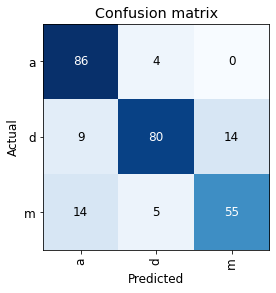

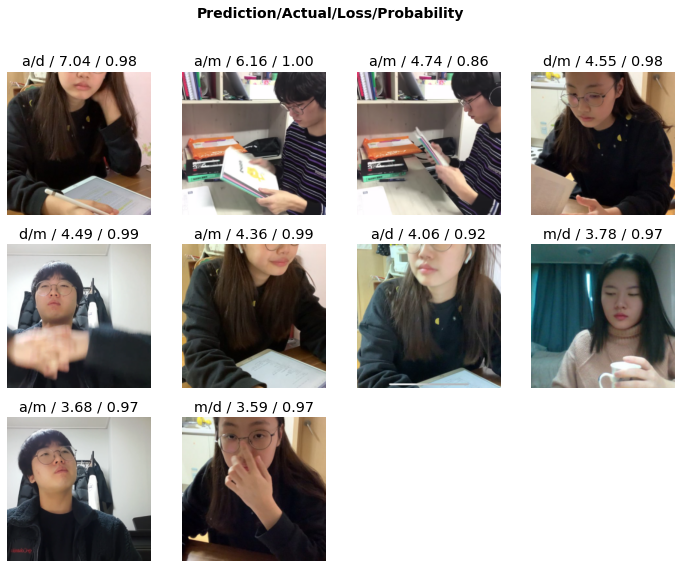

In [9]:

#함수

torch.cuda.empty_cache()
#데이터 블럭 생성
attention_datablock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter =RandomSplitter(valid_pct=valid_percent_value,seed=seed_value),
    get_y = parent_label,
    item_tfms = Resize(resize_value)
)
#이미지 일부를 잘라낸 새로운 이미지를 생성
#attention_datablock = attention_datablock.new(
#    item_tfms=RandomResizedCrop(resize_value,min_scale=min_scale_value)
#    )

#이미지를 왜곡하여 새로운 이미지를 생성
attention_datablock = attention_datablock.new(
    item_tfms = Resize(resize_value),batch_tfms=aug_transforms(mult=mult_value)
    )

#데이터로더 생성
dls_attention = attention_datablock.dataloaders(path)
#cnn 생성
# if(resnet_value==18):
#   learn = cnn_learner(dls_attention,resnet18,loss_func = CrossEntropyLossFlat(), metrics=error_rate)
# elif(resnet_value==34):
#  learn = cnn_learner(dls_attention,resnet34,loss_func = CrossEntropyLossFlat(), metrics=error_rate)

learn = cnn_learner(dls_attention,resnet50,loss_func = CrossEntropyLossFlat(), metrics=error_rate)

# elif(resnet_value==152):
#   learn = cnn_learner(dls_attention,resnet152,loss_func = CrossEntropyLossFlat(), metrics=error_rate)
#fit one cycle with lr_min
learn.fit_one_cycle(3, 1e-4)

learn.unfreeze()
#learn.lr_find()

#learn.fit_one_cycle(fit_value, lr_max=slice(1e-5,1e-4))
learn.fit_one_cycle(fit_value, lr_max=lr_value)

learn.export()
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()
interp.plot_top_losses(10)

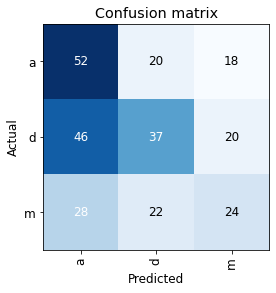

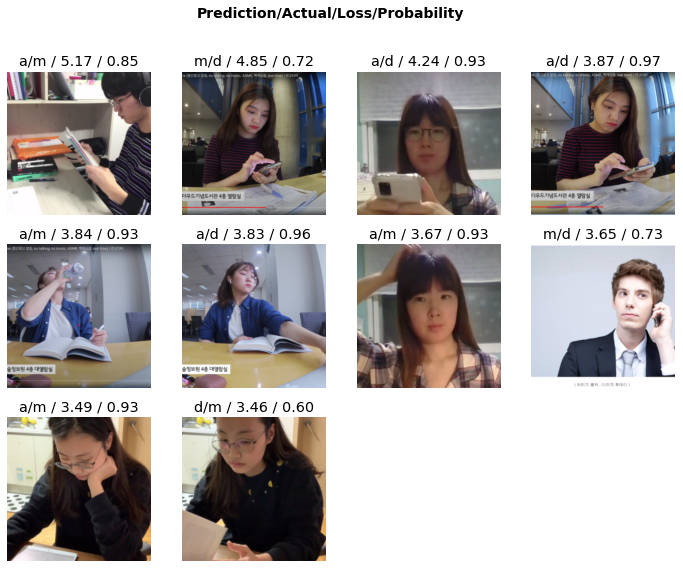

In [6]:
interp.plot_confusion_matrix()
interp.plot_top_losses(10)